In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the training set

path = "/content/drive/MyDrive/ARMY/learn-ai/deepLearning/Part 3 - Recurrent Neural Networks"
dataset_train = pd.read_csv(path + "/Google_Stock_Price_Train.csv")
train_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output

X_train = np.array([train_set_scaled[i-60:i, 0] for i in range(60, len(train_set_scaled))])
y_train = np.array([train_set_scaled[i, 0] for i in range(60, len(train_set_scaled))])

In [5]:
# Reshaping

X_train = X_train.reshape([X_train.shape[0], X_train.shape[1], 1])

In [6]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
# Initializing the RNN

regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularization

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularization

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularization

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularization

regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [12]:
# Adding the output layer

regressor.add(Dense(units=1))

In [13]:
# Compiling the RNN

regressor.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 77ms/step - loss: 0.0365
Epoch 2/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0039
Epoch 13/100
38/38 [=====

In [15]:
# Getting the real stock price of 2017

dataset_test = pd.read_csv(path + "/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat([dataset_train["Open"], dataset_test["Open"]], axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = np.array([inputs[i-60:i, 0] for i in range(60, len(inputs))])
# X_test = X_test.reshape([X_test.shape[0], X_test.shape[1], 1])
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 42ms/step


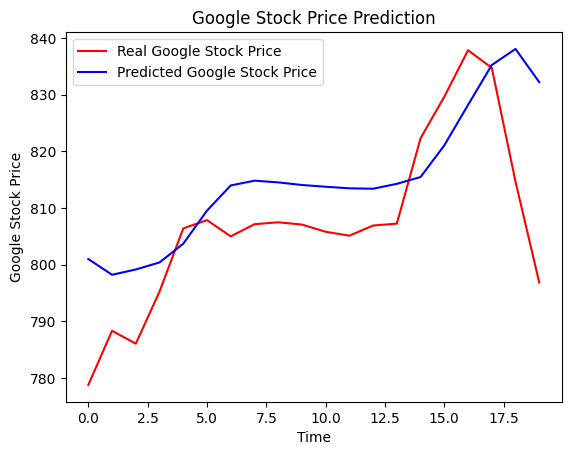

In [31]:
# Visualising the results

plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()